# Run regrid operation on CMIP6 (ocean)

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki
from rooki import operators as ops

## Parameters of regrid operation

In [2]:
rooki.regrid?

Signature: rooki.regrid(collection, method='nearest_s2d', grid='auto')
Docstring:
Run regridding operator on climate model data using daops (xarray).

Parameters
----------
collection : string
    A dataset identifier or list of comma separated identifiers. Example: c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest
method : {'nearest_s2d', 'bilinear', 'conservative', 'patch'}string
    Please specify regridding method like consevative or bilinear. Default: nearest_s2d
grid : {'auto', '0pt25deg', '0pt25deg_era5', '0pt5deg_lsm', '0pt625x0pt5deg', '0pt75deg', '1deg', '1pt25deg', '2pt5deg'}string
    Please specify output grid resolution for regridding. Default: auto

Returns
-------
output : ComplexData:mimetype:`application/metalink+xml; version=4.0`
    Metalink v4 document with references to NetCDF files.
prov : ComplexData:mimetype:`application/json`
    Provenance document using W3C standard.
prov_plot : ComplexData:mimetype:`image/png`
    Provenance docume

## workflow: subset only

In [4]:
sos = ops.Input(
    'sos', ['c3s-cmip6.ScenarioMIP.MIROC.MIROC-ES2L.ssp119.r1i1p1f2.Omon.sos.gr1.v20200731']
)

wf = ops.Subset(sos, time="2050-01/2050-01")

In [5]:
resp = wf.orchestrate()
resp.ok 

True

In [6]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 272kB
Dimensions:    (time: 1, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) datetime64[ns] 8B 2050-01-16T12:00:00
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 16B ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 6kB ...
    sos        (time, lat, lon) float32 259kB ...
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2020-07-02T07:42:51Z
    ...                     ...
    title:                  MIROC-ES2L output prepared for CMIP6
    variable_id:            sos
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.3.2
    tracking_id:            hdl:21.14100/a61b848d-26f6-4d92-acff-9916cdce624a

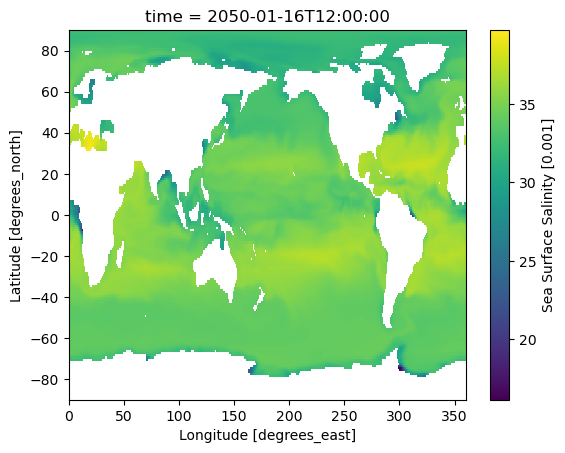

In [8]:
ds.sos.isel(time=0).plot()

## workflow: subset + regrid


In [30]:
sos = ops.Input(
    'sos', ['c3s-cmip6.ScenarioMIP.MIROC.MIROC-ES2L.ssp119.r1i1p1f2.Omon.sos.gr1.v20200731']
)

wf = ops.Subset(sos, time="2050-01/2050-01")

wf = ops.Regrid(wf, method="nearest_s2d", grid="1deg")

In [31]:
resp = wf.orchestrate()
resp.ok 

False

In [32]:
resp

Process error: The selected source and target grids are the same. No regridding operation required.

In [27]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 177kB
Dimensions:    (lat: 145, lon: 288, bnds: 2, time: 1)
Coordinates:
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 5kB ...
  * time       (time) datetime64[ns] 8B 2050-01-16T12:00:00
    time_bnds  (time, bnds) datetime64[ns] 16B ...
Dimensions without coordinates: bnds
Data variables:
    sos        (time, lat, lon) float32 167kB ...
Attributes: (12/49)
    Conventions:                  CF-1.7 CMIP-6.2
    activity_id:                  ScenarioMIP
    branch_method:                standard
    branch_time_in_child:         60265.0
    branch_time_in_parent:        60265.0
    creation_date:                2020-07-02T07:42:51Z
    ...                           ...
    grid_original:                data regridded to a CMIP6 standard 1x1 degr...
    grid_label_original:          gr1
    nominal_resolution_original:  1x1 degree
    regrid_operation:             nearest_s2d_180x360_145x288_peri
    regrid_tool:                  xESMF_v0.8.6
    regrid_weights_uid:           d24f4f689f12099406e6b95115553334_f3646e1560...

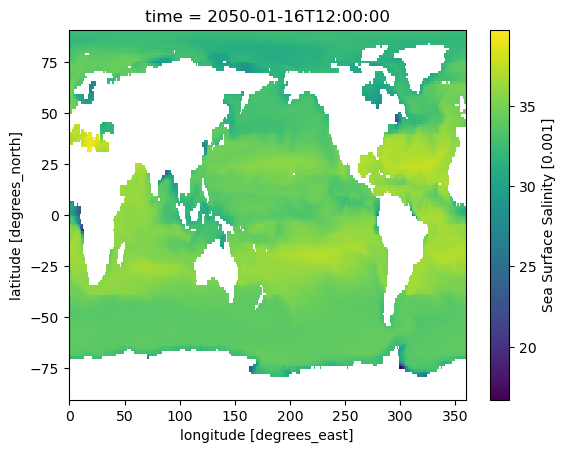

In [29]:
ds.sos.isel(time=0).plot()